In [1]:
import requests # To make get calls to API
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup # Helps make parsing html files much easier
from functions import *
import pandas as pd
import spotipy
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
from tensorflow import keras 
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import random
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# This token was granted through the use of Genius's website and allows us to make calls to the API
client_access_token = "_mDTViAvedsTbhpMuhLml-2gkMw1DU8tKQRnqmFkQDXT2aypVvCg67wDEr4eqBIs"

Using TensorFlow backend.


In [2]:
SPOTIPY_CLIENT_ID='19cb7472401c45c2acaa41ad01bb9e6d'
SPOTIPY_CLIENT_SECRET='7d3065a3086746f5bf7f94812e398230'

#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# RapCaviar Playlist (Import Playlist Here)
url = "https://open.spotify.com/playlist/37i9dQZF1DX0XUsuxWHRQd"

# # Pop 2021
# url = "https://open.spotify.com/playlist/02ES3fS2eHdLnDEuEUD60V"
artists = []
results = sp.playlist_items(url)
for idx, item in enumerate(results['items']):
    track = item['track']
    artists.append(track['artists'][0]['name'])
#     print(idx, track['artists'][0]['name'], " - ", track['name'])
result = [] 
[result.append(x) for x in artists if x not in result] 
print(result)


['Future', 'Lil Baby', 'Lil Tjay', 'Pooh Shiesty', 'Jack Harlow', 'Lil Durk', 'Pusha T', 'Southside', 'Hunxho', 'SleazyWorld Go', 'Gunna', 'Gucci Mane', 'Nardo Wick', 'Kodak Black', 'Internet Money', 'Key Glock', 'DDG', 'DaBaby', 'Fivio Foreign', 'Nigo', 'Juice WRLD', 'Jim Jones', 'Joyner Lucas', '42 Dugg', 'YG', 'Mike Dimes', 'Megan Thee Stallion', 'BIA', 'Latto', 'Coi Leray', 'Tee Grizzley', 'King Von', 'Kay Flock', 'Bas', 'Nicki Minaj', 'Yeat', 'Dreamville', 'Tyler, The Creator']


In [3]:
all_songs = []
for artist_name in result:
    songs = request_song_url(artist_name, 10)
    lyrics = [""] * 10
    index = 0
    for song in songs:
        soup = BeautifulSoup(requests.get(song).content, 'lxml')
        lyrics[index] = ""

        for tag in soup.select('div[class^="Lyrics__Container"], .song_body-lyrics p'):

            for i in tag.select('i'):
                i.unwrap()
            tag.smooth()

            t = tag.get_text(strip=True, separator='\n')

            if t:
                lyrics[index]+=(t)
        print(index)
        index = index + 1
    search_term = artist_name
    genius_search_url = f"http://api.genius.com/search?q={search_term}&access_token={client_access_token}"
    response = requests.get(genius_search_url)
    json_data = response.json()
    for i in range(len(lyrics)):
        lyrics[i]= clean_lyrics(lyrics[i])
    print(lyrics[0])
    index = 0
    for song in json_data['response']['hits']:
        all_songs.append([search_term, song['result']['full_title'], lyrics[index]])
        index += 1

Found 10 songs by Future
0
1
2
3
4
5
6
7
8
9

Call it how it is 
Hendrix
I promise, I swear, I swear
You heard, spit it, yo

Percocets , molly, Percocets 
Percocets , molly, Percocets 
Rep the set , gotta rep the set 
Chase a check , never chase a bitch 
Mask on , fuck it, mask off 
Mask on , fuck it, mask off 
Percocets , molly, Percocets 
Chase a check , never chase a bitch 

Two cups , toast up with the gang 
From food stamps to a whole 'nother domain, ya
Out the bottom , I'm the livin' proof 
Ain't compromisin' , half a million on the coupe 
Drug houses , lookin' like Peru 
Graduated , I was overdue 
Pink molly , I can barely move 
Ask about me , I'm gon' bust a move
Rick James , thirty-three chains 
Ocean air , cruisin' Biscayne
Top off , that’s a liability 
Hit the gas , boostin' my adrenaline 

Percocets , molly, Percocets 
Percocets , molly, Percocets 
Rep the set , gotta rep the set 
Chase a check  , never chase a bitch  
Mask on  , fuck it, mask off  
Mask on  , fuck it, mask

Found 10 songs by Jack Harlow
0
1
2
3
4
5
6
7
8
9


Baby back, ayy, couple racks, ayy
Couple Grammys on him, couple plaques, ayy
That's a fact, ayy, throw it back, ayy
Throw it back, ayy

And this one is for the champions
I ain't lost since I began, yeah
Funny how you said it was the end, yeah
Then I went did it again, yeah

I told you long ago on the road
I got what they waiting for
I don't run from nothing, dog
Get your soldiers, tell 'em I ain't layin' low
You was never really rooting for me anyway
When I'm back up at the top, I wanna hear you say
He don't run from nothin', dog
Get your soldiers, tell 'em that the break is over

Uh, need to, uh
Need to get this album done
Need a couple number onеs
Need a plaque on every song
Need mе like one with Nicki now
Tell a rap nigga I don't see ya, hah
I'm a pop nigga like Bieber, hah
I don't fuck bitches, I'm queer, hah
But these niggas bitches like Madea, yeah, yeah, yeah, ayy 
Oh, let's do it
I ain't fall off, I just ain't release my new s

Found 10 songs by Southside
0
1
2
3
4
5
6
7
8
9

Southside
Supah Mario
8

Yeah
Fuck these niggas 'cause they always bein' extra 
All these diamonds on me, I don't feel no pressure 
Money comin' in like I am an investor 
She tried to take a break, but I already left her 
Woah 
When I'm in my car, yeah, woah 
Look up at the stars, just like, "Woah" 
No feelings involved, yeah, no feelings involved 
Put that on my dogs 

I said no feelings involved 
Put that on my dogs 
Put that on my dogs 
I said no feelings involved 
Okay, okay, I don't need it
I don't need it, I don't want it
I won't keep it, matter fact I might delete it
Then repeat it, yeah 
Why you keep on going back? 
Yeah, I got my reasons, like
Yeah, I got my reasons, like
Car so fast, yeah, it's movin' like a beam of light 
Best rockstar of all time, hope that I don't die
'Cause I am immortal
Too bad you a mortal 
No wonder you normal 
Your girl saw me once 
She said I'm adorable, uh 
My diamonds so sick 
This shit is not curabl

Found 10 songs by Gucci Mane
0
1
2
3
4
5
6
7
8
9

Ha
It's Gucci, it's Drop Top
Wizop, whoo
Yeah, ayy 

You get the bag and fumble it
I get the bag and flip it and tumble it 
Straight out the lot, three hundred cash 
And the car came with a blunt in it 
Lil' mama a thot, and she got ass 
And she gon' fuck up a bag 
Pull up to the spot, livin' too fast 
Droppin' the dope in the stash 
In Italy, got two foreign hoes, they DM me 
Drop the top when it's cold 
But you feel the heat 
Be real with me
Keep it 100, just be real with me 
Eat it up like it's a feast 
They say the dope on fleek 

Percocet pill on me 
Ice on my neck, baby, chill with me 
Them niggas that post in the back don't say nothin'
Them niggas will kill for me
Back ends I count in my sleep, on fleek
Hundred K spent on a Patek Phillippe 
Bitch, I'm a dog, eat my treat 
Hop out the frog and leap 
I put them bricks in the fender
My bitch, she walk around like she Kris Jenner 
I used to break in and enter
Then Takeoff runnin' lik

Found 10 songs by Internet Money
0
1
2
3
4
5
6
7
8
9

Xanny bars, suicide door, brand new bag
College girls give a nigga head in my Rafs
Rockstar life, so much money it'll make you laugh, hey
These bitches, they hate, and you can't miss what you never had, hey, hey

Off the juice , codeine got me trippin' 
Copped the coupe , woke up, roof is missin' 
Ice , lemonade, my neck was drippin'
Ice , lemonade, my neck was drippin'

Addy boys, got some sixties in my bag 
Lips sealed, I ain't pillow talkin', I'm no rat 
In my earlobe, got two karats, VVS 
Got a penthouse near Rodeo off of stress 
All this money, when I grew up, I had nothing 
Filled with backstabbers, my old life was disgusting 
Can't believe it, gotta thank God that I'm livin' comfortably 
Gettin' checks, I don't believe her, she say she done with me
Burned some bridges and I let the fire light the way 
Kickin' my feet up, left the PJs on a PJ 
Yeah, I'm a big dawg, and I walk around with no leash 
I got water on me, yeah, ever

Found 10 songs by Fivio Foreign
0
1
2
3
4
5
6
7
8
9

New York City, please go easy on me tonight
New York City, please go easy on this heart of mine 

Yeah, look, huh, nigga, this my shit
Welcome to the city of Gods 
Pop was the king of New York, now I'm the nigga in charge
Only the drillers, the city is ours
We found out the opps and we pick 'em apart
I give 'em my time so I give 'em my heart
If the city love me, then I'm really a star 

New York City, please go easy on me tonight
Nеw York City, please go easy on this hеart of mine
'Cause I'm losing my lover to the arms of another
New York City, please go easy on me

Yeah, look, this is the city of money and violence
Everything we do is gon' come with a challenge
Every bitch you fuck is gon' come with a balance 
Every shooter with me is coming in silence 
And you niggas better pick a side 
You niggas side hoppin' 
If I want 'em to not let you come into the city, it's my option 
This is the home of the fly shoppin' 
This where the bitc

Found 10 songs by Jim Jones
0
1
2
3
4
5
6
7
8
9

I wear a mean dark pair of shades
And you can't see my eyes
Unless my head is bent, you dig?


We fly high, no lie , you know this 
Foreign rides outside , it's like showbiz

We stay fly , no lie, and you know this

Hips and thighs, oh my, stay focused

Ya boy gettin' paper , I buy big cars 
Eight fly rides just to drive in my garage

Stay sky high , fly with the stars 
G4 Flights
, 80 grand large 
So we lean with it, pop with it 
'Vertible Jones, mean with the top missin'

I'm sittin' clean with the bottom kitted 
I hopped out, saggy jeans and my rock glistened 
But I spent about 8 grand
Mami on stage doin' the rain dance

She let it hit the floor, made it pop 
Got my pedal to the floor screamin', "Fuck the cops!" 

We fly high, no lie, you know this 
Foreign rides outside, it's like showbiz
We stay fly, no lie, and you know this

Hips and thighs, oh my, stay focused

Slow down, here tonight, could be gone tomorrow 
So I speed through l

Found 10 songs by YG
0
1
2
3
4
5
6
7
8
9

Mustard on the beat, ho!

I said that I'ma ride for my motherfuckin' niggas
Most likely I'ma die with my finger on the trigger
I've been grindin' outside all day with my niggas
And I ain't goin' in unless I'm with my niggas
My nigga, my nigga 
My nigga, my nigga 
My nigga, my nigga 
My nigga, my nigga
Yeah!

First thing's first I love all my niggas
This rap shit cracked and I involve my niggas
You lookin' for some lean, lemme call my nigga
He sell it for the high, I need all mines nigga
Some niggas smoke smoke, some niggas drink drank
Got niggas on the block with the Glock that don't think
I said, "that's a nigga back up," they in a bucket lapped up
I got to act right if you niggas wanna act up
He talkin' like a snitch, no, that ain’t my nigga
He trippin' off a bitch, no, that ain't my nigga
Take a nigga case, yeah that's my nigga
Know him since I was eight, yeah that's my nigga
Fucked my first bitch, passed her to my nigga
Hit my first lick, p

Found 10 songs by BIA
0
1
2
3
4
5
6
7
8
9

It's a whole lotta money in this motherfucker 
It's a whole lotta money in this motherfucker

Ain't gon' keep me 'round no broke shit, that broke shit get old
Ain't gon' keep me 'round no ho shit, these hoes get too bold
I'm allergic to that no shit, my wrist game on cold
I might paint my coupe white just to match with my toes, yeah

I can't wear the shit you bitches wear because it's cheap to me
It's some money at my table, grab a seat with me
Cost a ticket just to cover all my legal fees
I don't hang with jealous bitches, that's a weak disease
Ho, don't run up
If you broke and in my business, then just shut up
I invested in my body, bitch, I'm done up
I look good, I like to fuck him when the sun up, uh

I put on my jewelry just to go to the bodega 
And I keep it with me just so that I'm feeling safer
Fendi on my body, but my feet is in Bottega 
Bitch, I'm getting money, give a fuck about a hater

It's a whole lotta money in this motherfucker

0
1
2
3
4
5
6
7
8
9

Helluva made this beat, baby

These niggas prayed on my downfall 
These niggas prayed on my downfall
On all ten, bitch, I stood tall
Show these disloyal niggas how to ball

Go get a thermometer for the pot, I need this shit cooked right
Let's keep that water 400 degrees Fahrenheit
You ever been inside a federal court room?
Nigga you ever went to trial and fought for your life?
Bein' broke did somethin' to my spirit
Asked niggas to plug me, they act like they couldn't hear me
Look at me now, drivin' German engineering
You don't want your baby mama fucked, keep the ho from near me
Kilroy, 'member when I used to use your L's
To hit the road, hit the O and make them big boy sales?
Mu, 'member when you had them green things mailed?
With vacuum seals, tryin' not to have them green things smelled?
Feds was on me, what you know about related through money?
I don't know nothin', I just used to see 'em walk to the Coney
I fuck with bitches, my body count go from Pershing to 

Found 10 songs by Bas
0
1
2
3
4
5
6
7
8
9

Lately, I've been, I've been thinking
I want you to be happier, I want you to be happier

When the morning comes
When we see what we've become
In the cold light of day, we're a flame in the wind
Not the fire that we've begun
Every argument, every word we can't take back
'Cause with all that has happened
I think that we both know the way that this story ends

Then only for a minute
I want to change my mind
'Cause this just don't feel right to me
I wanna raise your spirits
I want to see you smile but
Know that means I'll have to leave

Know that means I'll have to leave
Lately, I've been, I've been thinking
I want you to be happier, I want you to be happier

When the evening falls
And I'm left there with my thoughts
And the image of you being with someone else
Well, it's eating me up inside
But we ran our course, we pretended we're okay
Now if we jump together, at least we can swim
Far away from the wreck we made

Then only for a minute
I want t

Found 10 songs by Dreamville
0
1
2
3
4
5
6
7
8
9

If you miss me
And you can't find
Me nowhere
I done seen it all, oh my God
Uh
I done seen it all, oh my God, I swear
Uh, uh

Nothing new under the sun, nobody fucking with son
I got a couple of sons, a couple of guns
A couple of niggas that bust up the party and fuck up the fun
She digging me and I’m cuffing her friend
She ig'-ing you while we fucking for fun
I got her suckin' her thumb, that’s my lil' baby
She call me daddy like grandmama baby
If this Sunday dinner, my hand on her gravy
I been on the craziest wave, if I'm on the stage
An M is my minimum wage
This ain't no kennel, behave
Niggas is with all that barking, we send 'em a stray
So in a way we the dogcatchers
How many bullets your dawg catchin'?
Sawed-off, raw dog fashion
Hauled off, hope God catch him, damn

I woke up for some money, ayy, lil' bitch
Too many opps in here, tell me who you with, ayy

Potato over my gun
I move in silence 'cause niggas be clocking my funds
When 

In [4]:
# song = pd.DataFrame(all_songs)
# song.columns = ['artist_name', 'song_title', 'lyrics']
# compression_opts = dict(method='zip',
#                         archive_name='out.csv') 
# song.to_csv('out.zip', index=False,
#           compression=compression_opts)
song = pd.DataFrame(all_songs)
song.columns = ['artist_name', 'song_title', 'lyrics']
song.to_csv('rap.csv', index=False)

In [5]:
data = pd.read_csv ('rap.csv')
print("Artists in the data:\n",data.artist_name.value_counts()) 


Artists in the data:
 Jim Jones              10
Gunna                  10
Mike Dimes             10
Tyler, The Creator     10
Pusha T                10
Nigo                   10
DaBaby                 10
Joyner Lucas           10
Latto                  10
Megan Thee Stallion    10
Kay Flock              10
Lil Durk               10
SleazyWorld Go         10
Southside              10
Kodak Black            10
Tee Grizzley           10
Key Glock              10
Nardo Wick             10
Pooh Shiesty           10
Coi Leray              10
Jack Harlow            10
King Von               10
Gucci Mane             10
Dreamville             10
Lil Baby               10
Internet Money         10
Future                 10
Yeat                   10
Juice WRLD             10
Bas                    10
Lil Tjay               10
DDG                    10
BIA                    10
Nicki Minaj            10
YG                     10
Fivio Foreign          10
42 Dugg                10
Hunxho          

In [6]:
data["no_of_characters"] = data["lyrics"].apply(len)
data["no_of_words"]=data.apply(lambda row: nltk.word_tokenize(row["lyrics"]), axis=1).apply(len)
data["no_of_lines"] = data["lyrics"].str.split('\n').apply(len)
data.describe()

,no_of_characters,no_of_words,no_of_lines
count,378.000000,378.000000,378.000000
mean,2904.243386,688.947090,77.780423
std,943.796888,222.013829,24.495589
min,922.000000,186.000000,30.000000
25%,2237.500000,524.500000,61.000000
50%,2805.500000,660.500000,74.000000
75%,3346.750000,803.500000,90.000000
max,9164.000000,2019.000000,240.000000


<Figure size 1080x1080 with 0 Axes>

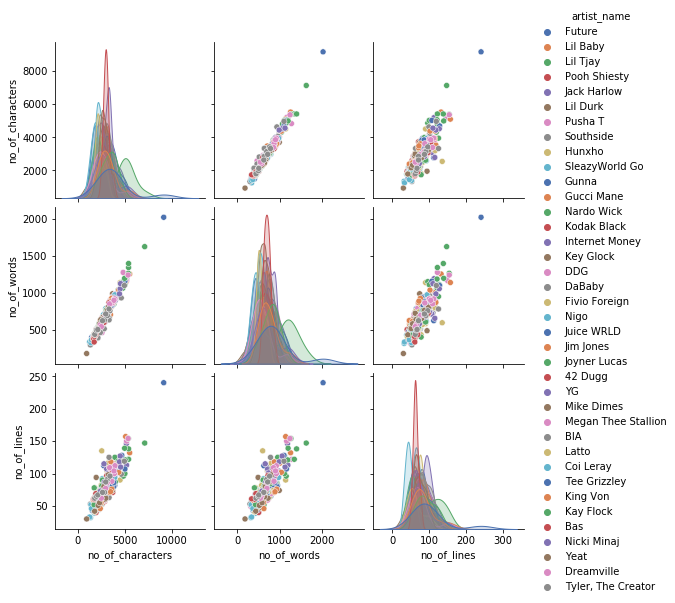

In [7]:
#Plotting the comparative song lengths for various artists
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="artist_name", palette="deep")


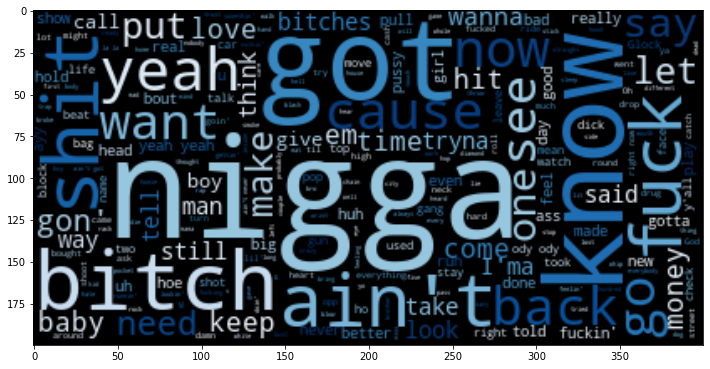

In [8]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#000000",colormap="Blues", max_words=800).generate(" ".join(data["lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [9]:
#Lining up all the lyrics to create corpus
Corpus =''
for listitem in data.lyrics:
    Corpus += listitem
    
Corpus = Corpus.lower() #converting all alphabets to lowecase 
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 128


In [10]:
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '!', '"', '#', '$', '&', "'", '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '¡', '°', '¿', 'à', 'á', 'ç', 'é', 'ê', 'í', 'î', 'ñ', 'ó', 'ù', 'ú', 'ü', 'ā', 'ą', 'ć', 'ę', 'ł', 'ń', 'ś', 'ź', 'ż', 'ʿ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', '\u205f', '\u2060', 'な', '楽', '音', '𝘐', '𝘵']


In [11]:
Corpus = re.sub("[^A-Za-z0-9'\.\n]"," ",Corpus)

In [12]:
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', "'", '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [13]:
print(Corpus)


call it how it is 
hendrix
i promise  i swear  i swear
you heard  spit it  yo

percocets   molly  percocets 
percocets   molly  percocets 
rep the set   gotta rep the set 
chase a check   never chase a bitch 
mask on   fuck it  mask off 
mask on   fuck it  mask off 
percocets   molly  percocets 
chase a check   never chase a bitch 

two cups   toast up with the gang 
from food stamps to a whole 'nother domain  ya
out the bottom   i'm the livin' proof 
ain't compromisin'   half a million on the coupe 
drug houses   lookin' like peru 
graduated   i was overdue 
pink molly   i can barely move 
ask about me   i'm gon' bust a move
rick james   thirty three chains 
ocean air   cruisin' biscayne
top off   that s a liability 
hit the gas   boostin' my adrenaline 

percocets   molly  percocets 
percocets   molly  percocets 
rep the set   gotta rep the set 
chase a check    never chase a bitch  
mask on    fuck it  mask off  
mask on    fuck it  mask off  
percocets   molly  percocets 
chase a 

In [14]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 1097804
Number of unique characters: 40


In [15]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 1097764


In [16]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = np_utils.to_categorical(targets)

In [17]:
# model.save('429723.h5')

In [19]:
from tensorflow.keras.callbacks import LambdaCallback

In [20]:
import sys


# Q1: What is the purpose of this block? When is `char_indices` used? What about `indices_char`?
chars = sorted(list(set(Corpus)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# Q2: What is the purpose of this block? What do the `seqlen` and `step` parameters do?
seqlen = 40
step = seqlen
sentences = []
for i in range(0, len(Corpus) - seqlen - 1, step):
    sentences.append(Corpus[i: i + seqlen + 1])

# Q3: What about this block? What is `x` and what is `y`? Why do they have this dimensionality?
x = np.zeros((len(sentences), seqlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), seqlen, len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    # Q3a: What happens in this loop?
    for t, (char_in, char_out) in enumerate(zip(sentence[:-1], sentence[1:])):
        x[i, t, char_indices[char_in]] = 1
        y[i, t, char_indices[char_out]] = 1


# Q4: Here we build the model. What does the `return_sequences` argument do? Why the dense layer at the end?
model = Sequential()
model.add(LSTM(128, input_shape=(seqlen, len(chars)), return_sequences=True))
model.add(Dense(len(chars), activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.01),
    metrics=['categorical_crossentropy', 'accuracy']
)

def sample(preds, temperature=1.0):
    """Helper function to sample an index from a probability array."""
    preds = np.asarray(preds).astype('float64')
    preds = np.exp(np.log(preds) / temperature)  # softmax
    preds = preds / np.sum(preds)                #
    probas = np.random.multinomial(1, preds, 1)  # sample index
    return np.argmax(probas)                     #


def on_epoch_end(epoch, _):
    """Function invoked at end of each epoch. Prints generated text."""
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(Corpus) - seqlen - 1)
    
    # Q5: What does diversity do?
    for diversity in [0.2, 0.5, 1.0]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = Corpus[start_index: start_index + seqlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, seqlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.
            
            # Q6: What is the dimensionality of `preds`? Why do we input `preds[0, -1]` to the `sample` function?
            preds = model.predict(x_pred, verbose=0)
            next_index = sample(preds[0, -1], diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=300,
          callbacks=[print_callback])

Epoch 1/300
215/215 [==============================] - ETA: 0s - loss: 2.2469 - categorical_crossentropy: 2.2469 - accuracy: 0.3534
----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "n it
i done got out the floor  who got s"
n it
i done got out the floor  who got she the she the be the fuck a stout  they got the bad it  i got the fuck a wast the for the fuck a wast the bitch  i'm the bitch  i got the start  she the start  they got the start  they got the fuck the stit  i got the face it the fuck it  she she the be the be the sime it the stit  i'm a stout the bitch  i'm a be the bitch  i got the way  they be the got me they got the gon' they got the start  t
----- diversity: 0.5
----- Generating with seed: "n it
i done got out the floor  who got s"
n it
i done got out the floor  who got she mo the bady bitch is bitch 
fuck it the card that me and frem and i don't net be chate the fuck a got the she the she she back in the baby 

like in the me
i'm rel

bought a bitch to the bank  they don't need to be and it all the grandma  i don't want me and the streets  i don't need no strapper  i got to started  she got a bitch  i gotta start the bitch  i gotta be another nigga  i don't need a bitch  she want a bitch  i got a bitch  i get the bank  i don't need no start  then i'm a bitch to be and the poppin'  i don't need a bitch  i got to the bank  they ain
----- diversity: 0.5
----- Generating with seed: "the whole set
5.56
shots at his neck

bo"
the whole set
5.56
shots at his neck

bought a nigga bag  bitch  shit  nigga  not an apposed  so i had to get a fuckin' the way it lick  the ones the wine  nigga 
they attere
getting lil' bitch  bitch shit  i mean bust 
i don't want the block   yeah 
no  no  no  now yo                                                                                                        
                                                                  
----- diversity: 1.0
----- Generating with seed: "the whole set


it's a prayer  i had to got no freak

and i don't need no droppers  and you ain't got a bag  can't say    come on the same at the curfing
i was truck niggas  i don't want your bitch  we gon' hold a coupe and this shit   had to say now i made it on the shook
i'm a life  baby  i think she want me a minute
i can't trust it up  i don't know when they catchin' 
----- diversity: 1.0
----- Generating with seed: "my niggas with me
bring some ice for my "
my niggas with me
bring some ice for my exolon
my baby ass  post
you come and they with  i went trap  ho 
niggas hundred  money 
spendin' on your feather a bitch and it go  she so pull up 
when you made it your niggas on the pass
fuck that you wanted
when he mouth  i'm sorry
i do this  that still who then wassed to slut shot is bag  you know you lose  i been poppin'
bitch  hole it your back and feel in rich  zaily

pussy empart
if we sh
215/215 [==============================] - 44s 206ms/step - loss: 1.4318 - categorical_crossentropy: 1.4318 

put you a race and tucked for yellocon and all a problem
the got tooking  and that nigga all hagding
i been this way 
ia lead for you
but i had to give shot hundred ust   i ain've collins  i'm just it
yeah  yeah  puck it 
my hishshot deep's
and get is in the saying no loo
liove
ale dirnky  i done heap  now i'm a faces  wasn't place
ti
215/215 [==============================] - 44s 206ms/step - loss: 1.4030 - categorical_crossentropy: 1.4030 - accuracy: 0.5700
Epoch 14/300
214/215 [============================>.] - ETA: 0s - loss: 1.3976 - categorical_crossentropy: 1.3976 - accuracy: 0.5721
----- Generating text after Epoch: 13
----- diversity: 0.2
----- Generating with seed: "like laffy taffy
split on the dick like "
like laffy taffy
split on the dick like a nigga  i was be the one that i got the streets  no  nigga  she say   i was later 
i don't wanna see you want  i made it out the coupe  i ain't gon' hate me   i ain't never have it  but i was straight out the bank  she bad  she bad 

i got the streets  i don't wanna fuck with me  i got a bitch  i got the trap  i got the streets  i don't trust my story  baby  i don't wanna fuck with me  bitch  i got the streets  i got the streets  i don't know what the fuck it  i got the streets  i don't trust niggas  i ain't tryna be the one they say the streets  i got the streets  i don't wanna see me  i don't wanna fuck with me 
the street  i
----- diversity: 0.5
----- Generating with seed: "collar 'cause she proud of what i said
i"
collar 'cause she proud of what i said
i ain't even gon' get the man off the streets 

i was so damn i just threw my life too much  i won't care the more that i said   i don't know how to said   i thought your father  i give it out stack  bra  bitch  they ain't the bitch  get the life  so i ain't trying to go but these lotto the streets  i ain't to stay off the triggers  i don't let the peach  i got the sturs  i been the time  i do it s
----- diversity: 1.0
----- Generating with seed: "collar 'cause s

 they like the way my neck shine  bitch  you know i'm sinnin' but show you to the condon  bitch  i see you think i can't stand it
yeah  i got a sellin'  like me  i'm that bitch an real  yeah
i can't stop the case 
i say you can't tell me why you no more to the commens  they don't know what my car prada  they touch the bitch to something in the face

i don't need no shots  i don't need no crawgens  i ain't gotta started like the most lik
----- diversity: 1.0
----- Generating with seed: " they like the way my neck shine  bitch "
 they like the way my neck shine  bitch   it'll be take the late more for me  man  my nech bitches  she toucain me 
ye happenin' from braintoaster
in my christ  it's grind that you usofitr ofte that that i'm in all beyond to  get net boxing niggas
i'ma ooh some's no secker a guns like the sess
a bitch
ooh 
chop squeems kicks like me
the room 
i just gotta meer on a drive
uh  push it feel 

this magic tonifody got you
i called  get all i
215/215 [=================

d you got a shooter he like shaq  though is not some some've don't have to stick in the holl
right  that cheopags always in the pills
you you in my swag
bad bitch
i callris i tley us 
somebody 
if i can't even know no houncs come with th me out the weithing gon' lil' up  he just can
die  fucked up on that boy bitch
i'm then lil' shit don't know aboot 
bought a can could look from the ground 
everybody ain't playin' my paper for now
rire
215/215 [==============================] - 45s 209ms/step - loss: 1.3659 - categorical_crossentropy: 1.3659 - accuracy: 0.5806
Epoch 27/300
215/215 [==============================] - ETA: 0s - loss: 1.3642 - categorical_crossentropy: 1.3642 - accuracy: 0.5809
----- Generating text after Epoch: 26
----- diversity: 0.2
----- Generating with seed: "ey bitch wanna fuck me 
might let her fu"
ey bitch wanna fuck me 
might let her fuckin' one of the street  i don't know what you do it and the trap  i got the shit i ain't got the shit  bitch  i want it  i got t

215/215 [==============================] - ETA: 0s - loss: 1.3587 - categorical_crossentropy: 1.3587 - accuracy: 0.5822
----- Generating text after Epoch: 30
----- diversity: 0.2
----- Generating with seed: "'cause it ain't no script and it ain't n"
'cause it ain't no script and it ain't no more the bag  i'm a start  then i can't tell me i ain't gon' see me  i'm a heart  i was still heard i know i get it  she a little been should be the shit  i don't know how to go  they say they say   i got a big bank  baby  i got a bitch  i got a bitch  i got a beam on the shit  i'm still in the shorty  i ain't gon' see me  i'm so cocky  i'm so cocky  i can't get you all of the streets  i ain't g
----- diversity: 0.5
----- Generating with seed: "'cause it ain't no script and it ain't n"
'cause it ain't no script and it ain't no more
just told me the fuck with the problems in the scene
i know i get in the back  i done been the one you want  i'm stack   baby  i'm from the back on my life  yeah
i was a 

you must not know me baby  i don't wanna see you wanna see you to the street  i got a ball  i got the street  i got a bad bitch  i don't wanna see you wanna see you wanna see me they got a bad bitch  i got a motherfuckin'  i don't know what i wanna see you walk with a collar  i don't wanna see you wanna see you wanna see you wanna see you to love me  i don't know what they say   baby  i was in the back on the game  i got
----- diversity: 0.5
----- Generating with seed: "baby  ooh  yeah
you must not know me bab"
baby  ooh  yeah
you must not know me baby  i know it was the more that i don't wanna leave you 
they already back to my bitch  i don't get the choppers on my pole
still have to ment  i don't trust me 
you can't get a plottin' but they going all off my mind now
i wanna see you to make a show and put on one
some hittin' it 
i was some movem
every wavin'  i'm all i ride with the street  yeah  yeah  they ain't talkin' 'bout  you can never w
----- diversity: 1.0
----- Generating with

my back  i'm on my mama  and i was just mad that i can see me in the block  and i was boy respect  i don't real  then shit for my brother  she so demons  one thing i don't need no crock and i keep the nigga fly hit it smoke 
you ain't got when i was hood  i wouldn't get me the game say sent my lood  we don't go  and who the front seat of the draco  i want t
----- diversity: 1.0
----- Generating with seed: " gon' make him collapse 
i do not smoke "
 gon' make him collapse 
i do not smoke aguit  every momma ride

 stop as have him oo
these he gon' leave me ad6mrh
i got her   she sublahts  lawho 'bad somewhere for you g
 i love my car  i know she sayin' 
these sayes i be greet clactin' her kide
my oohdha  normer
i don't hear me now  don't might follow the dobit
i don't love it faked  yeah   she had to go
obace
500 tag i gleam lax
then lycuise to my expmat
do 
grrah
mad this block  h
215/215 [==============================] - 42s 197ms/step - loss: 1.3516 - categorical_crossentropy: 1.3516

bitch i'm bucked with the stleevelut
i don't let that bitch  where your check
na want my friendr  don't leave   and the block sit to jet of drown
all the dats  i told me swag cry dream time  i'm ready  stroomin' myself
take freebro were is you  don't seat kowns man 
dimskend much man  then i'm childbe
215/215 [==============================] - 43s 198ms/step - loss: 1.3491 - categorical_crossentropy: 1.3491 - accuracy: 0.5851
Epoch 44/300
215/215 [==============================] - ETA: 0s - loss: 1.3482 - categorical_crossentropy: 1.3482 - accuracy: 0.5852
----- Generating text after Epoch: 43
----- diversity: 0.2
----- Generating with seed: "u
blow shit  pussy boy  you ain't gon' b"
u
blow shit  pussy boy  you ain't gon' be a nigga that i still go to the morning  i want the streets  i got the streets that i can tell that i still got no shooter  that nigga a real nigga  now i stay focused  i want the strap and i done took your bitch and the fuck a nigga too hard  that i still see me th

i don't wanna see me  i don't need no chase and i like the beat  i got the streets  then i was still ain't no bitch  i got a big bag  bitch  then i get the bitch  i got a bank  baby  i don't know what you gon' see you want somethin'  i was in the bag  but i got the bag  but i got the beat  i got the car  i got the streets 
i was a beef if you still ain't no more than the streets  i don't get you the 
----- diversity: 0.5
----- Generating with seed: "is glock  and he gon' shoot to kill 
i d"
is glock  and he gon' shoot to kill 
i don't wanna fuck with me  i like to the dreams and they gon' drink it for another way  i might get it  they just been tryna make me the one that i don't see a bring the hatel  i should be here in the broad   yeah  yeah  yeah  yeah  yeah  yeah  yeah  we gon' have a bitch 
i was in the cash
why you still gotta get the block  i ain't for real
i pull up  we do love and i was the one the block  got a ba
----- diversity: 1.0
----- Generating with seed: "is glock  and

my shit  she be real that they screws  i got the sold coupick  break you better don't do no bitches 
i'm that lil' baby ass  don't be the one that i leave you with my niggas 
let's get fixed  i ain't gotta fuck with you  i'm a keep it living ass niggas bad  she bad  she bad
i wanna come to see you in the crack of the post  throw me 
----- diversity: 1.0
----- Generating with seed: "ck
take the air out the ball   just so i"
ck
take the air out the ball   just so i'm drips inside it  god as i lan i got it  i can t thought
but off red  i ain't expellame the weekents back  she told you for a dollar 
yeah
bring thatge men  i'm not ass posten  yeah
i wake up put the patta and
when she better might one  blive no die  bistever six 
hands
please quick  cheekich  keep her hundreds 
i don't care it over it
herin' him  'k 

matted off niggas 
nobe saint racks for sai
215/215 [==============================] - 43s 199ms/step - loss: 1.3435 - categorical_crossentropy: 1.3435 - accuracy: 0.5866
Epoch

throw out the back with my air   don't ever my nigga 
whip once
they gon' get in 
finged out them bitch  i'd make him a this bitch a hood  coff his face  yeah
i mean  my damadd i'll sell of
used the night 'cause the lil' baby first my dawgs  baow   roll ride bandockoo  l
215/215 [==============================] - 43s 198ms/step - loss: 1.3416 - categorical_crossentropy: 1.3416 - accuracy: 0.5875
Epoch 57/300
215/215 [==============================] - ETA: 0s - loss: 1.3414 - categorical_crossentropy: 1.3414 - accuracy: 0.5871
----- Generating text after Epoch: 56
----- diversity: 0.2
----- Generating with seed: "i swallow make me want you i'm just hone"
i swallow make me want you i'm just honest  i don't trust the problem  i don't trust you  i got money  i don't got no more than a pass me  i don't got no feelings  i don't trust you  i can see you the really gon' stop  she say they ain't the street  i don't trust you  i don't wanna see you to start the back  i don't wanna see me  i'm ju

i got 200 on the bag  baby  i don't got no chains 
i was the one then i can't stand me  i'm so cocky  i don't know me  i was just to take the party  i don't know me  i was still ain't no shots  she got the shit  i'm so cocky  i was still got a bitch  i don't know how to go to sleep  it's do it  i don't know the house  i don't know how to go to start to the store  i'm a bandit  they gotta have them body  
----- diversity: 0.5
----- Generating with seed: " bag i'm 'bout to catch today   
i got 2"
 bag i'm 'bout to catch today   
i got 200 on me  i'm freeze the back up  get it  but come like me  
if i go to see you pussy to the faming  blow the different niggas  i done been down 
they ain t promether you  i don't do chase
and i stay the shit  it's me a whole lotta good  we gotta have it come from the street  kill a saviter   they tryna come but they want  it's hatin'  he say i'm still in the mession  i'ma go bet the problem with 
----- diversity: 1.0
----- Generating with seed: " bag i'm 

we calling me to be a song to sell a hundred  i don't trippin'  still be care  but i was hot goin' my school  it's hearen and shit is the first let a nigga in my fan  they ain't too 
they don't wanna see you can see 
she say a fool the glock  baby  i left the start  then the same reason  it's just met you  i don't follow the shit with the problem  i was and 
----- diversity: 1.0
----- Generating with seed: "ust one on one
ain't have relationships "
ust one on one
ain't have relationships 
feel the hour  look how i  no hit you
you know  10 feet
moonwalking shit
hold they just fuck with her go  bust
yo  yeah  yeah  i see over my face
she keep wear where i'm time if you know you rocking cash on ya  john telling dip 
girl you hearditty
have went back
know i see we love
throw up that bag on the back 
i got me
and you wanna  gag was gon' explexat
choplil'  nigga  you's timed this a demo
215/215 [==============================] - 43s 200ms/step - loss: 1.3384 - categorical_crossentropy: 1.338

about the respect if she lamb'  watch you out

 off every millfow datic
so helley acting with shit  slide days up 
do it play off shots 'cause i conkid up on the gang

dej  dlay night
she don't fuck with my business
hanger gon' hurt brukenuss hold a zyek
but she don't move u real one it  london thought gloss i'm friends in t
215/215 [==============================] - 43s 199ms/step - loss: 1.3368 - categorical_crossentropy: 1.3368 - accuracy: 0.5882
Epoch 70/300
214/215 [============================>.] - ETA: 0s - loss: 1.3365 - categorical_crossentropy: 1.3365 - accuracy: 0.5886
----- Generating text after Epoch: 69
----- diversity: 0.2
----- Generating with seed: "ow you ain't gon' shoot  
pass me the dr"
ow you ain't gon' shoot  
pass me the drop  i don't get off the coupe  i was just smoke and i'm stackin' up  they have a fingers  they gon' see you the streets  i got a million with a bitch  i'm a brand new when i make it have a nigga like that  i been through the trap  i got a band

respect the whole gang 'fore a blue bend  i don't wanna be the one that i said i'm still don't really gon' see you want to see you see me  i got a bitch  i don't know what they say   yeah
i ain't tryna get the party  i don't fuck with you with the pain  i don't know who the fuck is the face  but i was still ain't stroke and they say i was still and they gon' see you want some shit i was still still gon' see the bank  i'm so cold  but 
----- diversity: 0.5
----- Generating with seed: "y
respect the whole gang 'fore a blue be"
y
respect the whole gang 'fore a blue bean  when it's been a shit i got a million back  no seen that i was still for the drop  they gon' sun this shit if i don't drink it up  they tried to fuck with the family  you be gone like a bitch  she say  she pass it her through play with the air

i made it up  she had no chin mars  fuck it  i got a bitch  she say i got a lil' bitch  it's a glock  hold up
raise  i'm havin' to see it  they ain't g
----- diversity: 1.0
----- G

'cause you make my earth quake  they touch me  i like to go to the benz
she feel like me  i got the night  i be out of the cash 

i just want my bitch ain't nothing on the millions and face  my nigga  nigga  nigga  i'm pouring  now i walk too much  
we gon' be a shit in the booth and they pussy  i don't need no more
i don't know what they don't even got no morey  and they know we catch us
i was just been the streets
and it f
----- diversity: 1.0
----- Generating with seed: " this time

'cause you make my earth qua"
 this time

'cause you make my earth quake  i'm numin  caund a miss it
with my dalla

you got to they like we heard to pluges
and if that sweetel   euconds i fear on i gun of my name  i'm wills
block nothing
wanna let it pulled on her out chavys
juen over weathing at my swat obse on  sleazy 
hah pacaman
get you
ain't good em tricks 
biofy like manma high  i'ma been be once placas 
see ap suit they cousins  and 'ro supital simper but goi
215/215 [=============================

and a 350  no to carcome of you  she para last nigga fix my him and go that men can do her trust
my name on the chasenc
i do
i'm a mutta stop took my yellow show
if we releision the linternes 
when they been probably diatilf
i could few up that said don't what's a shaf i'm super fly    i do this   boo they break  and glears come and put me out no ref 
started away 
215/215 [==============================] - 45s 210ms/step - loss: 1.3330 - categorical_crossentropy: 1.3330 - accuracy: 0.5893
Epoch 83/300
215/215 [==============================] - ETA: 0s - loss: 1.3330 - categorical_crossentropy: 1.3330 - accuracy: 0.5897
----- Generating text after Epoch: 82
----- diversity: 0.2
----- Generating with seed: "r mothers deep penetration
this diamond "
r mothers deep penetration
this diamond so i'm so cocky  i'm sorry
i can't take the baby  i don't need you a hot niggas  i'm so cold  i don't know about the reason now  i'm a star  you know i'm super fly 
i got a bandit  i stay for the shit  

215/215 [==============================] - ETA: 0s - loss: 1.3324 - categorical_crossentropy: 1.3324 - accuracy: 0.5896
----- Generating text after Epoch: 86
----- diversity: 0.2
----- Generating with seed: "rtin lawr nce
i kicked her out the bedro"
rtin lawr nce
i kicked her out the bedroom  i got me a bitch  i want it  i ain't no bitch  i'm a big body treat me  i got a nigga with the back  i got the streets  i got a bitch  i'm a bitch  i can go and my bitch  i can't get you off my mind now
i got the streets  i can see you to get it  i don't need no chains  i got a banger  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  y
----- diversity: 0.5
----- Generating with seed: "rtin lawr nce
i kicked her out the bedro"
rtin lawr nce
i kicked her out the bedroom  i'm runnin' 
where your ass was at me  you know you want me on my pinky  it's my fantas 

i can't have to meet off the worst  but i want it  i don't feel nothing on a soldie

i was just to say i said   what you got the street  i don't gave me the shit  i don't want no straight  i can see in the south and i know  i got a beat and the family  i was just to fuck with you  i don't want smoke with me  i got a bitch  i don't want smoke with me  i don't want none of your lacking  i can see in the bag  i don't want no straight  i d
----- diversity: 0.5
----- Generating with seed: "lil' white bitch with supersized titties"
lil' white bitch with supersized titties  i can see in the chail  i really go to the street went on my daddy  when you don't eat of me  i had to go to get some shit we don't really want some while they say they in a count me  but i was countin' one of a lot  but i don't want smoke
who do you say   i don't do thick  i can do it  we don't make you can i got a bank tack the country  i swear i fool  i don't want smoke with me
i was fine a l
----- diversity: 1.0
----- Generating with seed: "lil' white bitch with supersized titties"
lil' white bitch wit

i know i see you smoke a nigga diamonds up   i know i can't take the clothes  i was still gon' feel a type of some shot  i know that where it cool  nigga  i might even do this with the fuckin' like a mutt  we ain't got saved the back  she gon' listen to the money to see my own  you know that shit a keep it out  he gon' see 
----- diversity: 1.0
----- Generating with seed: "suicide doors  britney spears
i'm boujee"
suicide doors  britney spears
i'm boujeed pantice at it
make her than eoogo wig to parage is until cost
got one beats if we get syrank  i spot me brue me so bucks
like headgearr
ask 'em rich  that's so a one so
hound a place 
i know hundred discocs think i a boshit  what' lookin' boy dry  birl when your bitch with everything that's gonna fight
huh

i don't exhoun  the house couse like
where you louch main a fuck i play with me you
young
215/215 [==============================] - 47s 217ms/step - loss: 1.3307 - categorical_crossentropy: 1.3307 - accuracy: 0.5896
Epoch 96/300
2

things that new  firalf the pint bustso
bitch 

i don't beling you work some somewhin'  money for modne i drop up  he played her
real eight  glew she miguy  it ain these niggas that assanomas 
then racos  
i ain't seal with the whole ain'
niggas want 'em
see hill i'm high today 
you
215/215 [==============================] - 46s 212ms/step - loss: 1.3302 - categorical_crossentropy: 1.3302 - accuracy: 0.5903
Epoch 100/300
215/215 [==============================] - ETA: 0s - loss: 1.3305 - categorical_crossentropy: 1.3305 - accuracy: 0.5896
----- Generating text after Epoch: 99
----- diversity: 0.2
----- Generating with seed: " don't really fuck with no... 

gucci ga"
 don't really fuck with no... 

gucci gang  i don't got no brother  i don't play with me  i'm so cocky  i'm a star  they all fuck with me  i got the bag and the room a start it  i'm so cocky  i got that big bag  baby  i ain't trust me  i'm the one that i was a show me the shit  i got that shit  i don't need no shit  i'm so 

all my niggas call me wick and i was just to get the bank  bitch  i was born in my pickin  they ain't got no start to me  i don't know what the fuck is the dope  i don't know me  i got some like a black on my mind now
i got the pain  i don't know about the book  i'm so cocky  i don't know what i stay for the baby  i don't got no finna and they gon' be the one you  i don't know what i stay for me  i don't know me  i got a big 
----- diversity: 0.5
----- Generating with seed: "broad day

all my niggas call me wick an"
broad day

all my niggas call me wick and i was somethin'  i can't tell me i was so mhm  i miss you  i don't really fucking with the boy  you on my brother  they ain't tryin' to go to the way the part when i was just to go   don't compatic on my way
when i stay four  but i was in the way  i still got a passes 
i got some piece know what i got a while i i was tryna get a real more 
i was born to touch my drip  they ain't going again
i go
----- diversity: 1.0
----- Generating

stack then ram in with the business  you a brand new month  no bitches ain't shit on it  yeah  the top  she the ones i got the masks  she told me to go to the face  we could never stay to go somethin'  i be on the passes  i'm sorry  bust it up  start the city  then i'm big bend from the drive me  i'm a star  my shit bitch  i'm on the back  feel like a foreign  it was a star so much of it
all my shit  come and 
----- diversity: 1.0
----- Generating with seed: "
roll the dice like a cast
stack then ra"

roll the dice like a cast
stack then rappin'   we can't fuck all them lolm i'm trying to weld on my fucking for taster and collebers croof
you back to my bitch at tim
to wake up with a beam hopingracchings on can  me  do what tryna see you briigeed slogh you there  i'm sicken last
shawty glocksle  she say   rail wold me late  i'm never decor 'til that money  i let it happen slitty in the life 
i startless is a lots  fuck it up  spend o
215/215 [==============================] - 47s 219ms/

bitch is that young chare even so quick way with 

in catchin' that to god  come hope you know my fire you talking that i put it opsorf on my kids until track  prolly got pool  that shit just all tag  for a blow  then insee  clashid key
i keep him  
she's so moves  i know you like it bands
bitch  i'm tryna flardled  you laoko88 maca
bitch  please go talk abo
215/215 [==============================] - 46s 216ms/step - loss: 1.3279 - categorical_crossentropy: 1.3279 - accuracy: 0.5904
Epoch 113/300
214/215 [============================>.] - ETA: 0s - loss: 1.3277 - categorical_crossentropy: 1.3277 - accuracy: 0.5905
----- Generating text after Epoch: 112
----- diversity: 0.2
----- Generating with seed: "t let down
heard i'm down seven hundred "
t let down
heard i'm down seven hundred  they know i ain't got no more
i don't even let that nigga  i don't know what that nigga  i don't know what they tryna find a nigga move  i can see me  i don't know what that shit that bitch a big  boo  i wa

215/215 [==============================] - ETA: 0s - loss: 1.3271 - categorical_crossentropy: 1.3271 - accuracy: 0.5910
----- Generating text after Epoch: 116
----- diversity: 0.2
----- Generating with seed: "bottle in the air  livin' without a care"
bottle in the air  livin' without a care  i'm sorry  i'm so cocky  i got a bitch  i can't see the bag  she gon' show you to show me in the sound  they say i'm some some door  i got a bitch  i'm the shit  i'm sorry  i don't wanna see you with the check  i got a bands too many baby  i got a bitch  i can't stand it out  i'm sorry  i'm so cocky  i wanna see you to see me  i got a boy  i wanna see you took the shit  i got a bands on my nigga
----- diversity: 0.5
----- Generating with seed: "bottle in the air  livin' without a care"
bottle in the air  livin' without a care of the mouth  gotta pay my neckle  i'm shootin' the head  i think the air out the reason  i'm sorry  gotta be the one shootin'   you know
i got a boosie
real shit  i got a bad

nigga  i don't owe you like you never on the roof dick  i got a benz  what that nigga  got a brother  when i get in my car  i don't wanna see you love  but i don't wanna see you think i got a ban gon' hand me  i ain't the strippers  i got a bands on my chain  i don't wanna see you think i got a deal  i got a bitch  i don't know what they say   got me that bitch  i don't wanna fuck with my chain  i ain't got a bands on my momma  i got a
----- diversity: 0.5
----- Generating with seed: "
nigga  i don't owe you like you never o"

nigga  i don't owe you like you never on the news  don't even go to spend the gang  got a delast
we ain't care about it  my feet  had the truth and slime


i ain't got in my opp  that shit close the brother
i got the states  bitch  i see it  but i go to hell  got a lil' nigga for the coupe  that nigga  i been this phones  we gon' show you  i been the shit

i don't wanna see you think she want down  like  i know they trippin' 
she got a
----- diversity: 1.0
----- 

chwi love  ta jebana mi o   z zamyyy   jest    do te        pochczy    na si  zakie  do zapk                                                                                                                                     
                                                                   
                                                           

                                m m hmm hmme  last night when i ain't ta
----- diversity: 1.0
----- Generating with seed: "y mnie m cz 
chwi love  ta jebana mi o  "
y mnie m cz 
chwi love  ta jebana mi o  sit jek  e czenam  poczyj staynieriel   a colone  twalchi
nie tym k mam vladimiste wial  sziraz  nie najmia     no
uh  ke to  newwadziraze jesteja   powel ka i na gasz  sark z  vladimir     mam go kodap   kurza slaj  y tko  konouldzy  gaby litczyz po   przyazwsziedzi
ona l szely zashi sta   go  cie  prawdra z heryoza tycz  m
nit chrow
my     poz
m  mor le k   na garger
y mus  ve t smankin
co  n  b
215/215 [==============================

you gotta get you ever get look with her all with my bitch call  that's openight now
wocked up my deal winned  i get pacats
i need to watchin' 
sorry
going to some new arawer lows  that bosses  don't trust to now
girl  you about it  you a luck ye you aheads  she gon
on the foresest is a quarter out the storich
she just watchin' running out
lemon pop ryb  your g.t  i'm lawin'  come and get say
215/215 [==============================] - 48s 221ms/step - loss: 1.3260 - categorical_crossentropy: 1.3260 - accuracy: 0.5913
Epoch 130/300
214/215 [============================>.] - ETA: 0s - loss: 1.3260 - categorical_crossentropy: 1.3260 - accuracy: 0.5912
----- Generating text after Epoch: 129
----- diversity: 0.2
----- Generating with seed: " with smiley  speak of me highly
tryna g"
 with smiley  speak of me highly
tryna get the streets  i don't need no star so i got a dollar  they said i got the car  they say i'm still that shit  and i don't know what they say i'm still down  and i don't ev

214/215 [============================>.] - ETA: 0s - loss: 1.3251 - categorical_crossentropy: 1.3251 - accuracy: 0.5914
----- Generating text after Epoch: 133
----- diversity: 0.2
----- Generating with seed: "ay i move my lips
i be speeding  could'v"
ay i move my lips
i be speeding  could've been shit
i wanna see you to make me a bitch  i'm from the moon  i'm so cocky  i don't want something  i don't wanna see you to be the team  i ain't gon' stay focused 
i don't wanna see you don't come to the street  i don't wanna see you to be here  i don't know what the fuck is the back  but i don't wanna see you don't wanna see you and the same things  they know what i'm super for my bitch  i'
----- diversity: 0.5
----- Generating with seed: "ay i move my lips
i be speeding  could'v"
ay i move my lips
i be speeding  could've stop the shit  i'm flying the jakes 

the streets  i'm so a mans  not wait to do the drink  don't wanna be the one you for the white  i know i'm like the back  but i stay foc

i was just been like a bitch  i don't wanna see the gang  she gon' see the coupe  they ain't stay in the coupe  i don't wanna see the bank  bank  bank account  i'm the one you to see they could the real and they can't forget you what you want  i'm sorry  i don't wanna hear that i don't want none of you can'
----- diversity: 0.5
----- Generating with seed: "e cancun 

hol' up  get right witcha
tak"
e cancun 

hol' up  get right witcha
take the shit so i ain't gotta song  you ain't never gon' see it up  color than my brother on the trap  but my day to see the roof what i can see the seen the money  i'm finna drop the room  then i'm pushin' p and i feel like my pockets down  no  dj on fuckin' money bringin' the day when i'm super found  still get the preachin' like a good liver  i be saved  we don't know what it is why you droppin' 
----- diversity: 1.0
----- Generating with seed: "e cancun 

hol' up  get right witcha
tak"
e cancun 

hol' up  get right witcha
taked of around
bro  make bro

i was in the foreign  and i ain't tryna see a nigga too all them black  i'm some boys  i got me that i got the side  i got you in that christa most to his five her move
they stell down    hold up  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah 
you know what we come up  when we been in the tomma  then i got the cops come and i'm finna come an
----- diversity: 1.0
----- Generating with seed: " niggas scared to come around when i pop"
 niggas scared to come around when i popped on
i had to let them hate 

they that blow jammert
i'm tryna drop that stayin  every day
i was poppin' doc
one time i turnt  i get a coupe  can't cap is a biven wock' off and to lord of konta his benz interter 
i'm buyin' shit funna turnt  it's garls sove might took a verse  ooh  okay too all of my feet   we bettin' pace  my bitch who wal' head that lamb' as i go
supe when up to play nigga  ye
215/215 [==============================] - 60s 277ms/step - loss: 1.3239 - categorical_crossentropy: 1.3239 - 

sex for verse the shit it 
two hot  hommichial in pats
another lemonax from it  i told my next beet like  it was roll up  niggay get it flag  my smoke ratchet milas for you  brand new bag waiting 
can't go a hust his days 

change 'em play off the g's i checkin' shit gon' think i made it 
i think 
215/215 [==============================] - 57s 264ms/step - loss: 1.3240 - categorical_crossentropy: 1.3240 - accuracy: 0.5916
Epoch 147/300
214/215 [============================>.] - ETA: 0s - loss: 1.3235 - categorical_crossentropy: 1.3235 - accuracy: 0.5919
----- Generating text after Epoch: 146
----- diversity: 0.2
----- Generating with seed: "do what you just took and that's a fucki"
do what you just took and that's a fuckin' bitch  i can't stand it off  i'm still the back  she told me  i'm tryna get the more
she got a bitch  i don't want you to see the chain  they don't want it 
i stay in the car  i don't want the start  i don't get it back  i'm a motherfuckin' bitch  i got the drugs  i

we don't do no be talking back  i'm still with the drop the paper  i ain't got a bands in the car  i'm a bandit  i got a benz in the country  i'm a bag on my gold like a bands on my chains
i'm a big bag  big ass  i don't wanna see you don't want the street  then i started off the fire   i got a bands on my mind now  i'm a big bag  big bag  big bag  big bag  benz  i was behind me
i'm a bag on my shooters  they g
----- diversity: 0.5
----- Generating with seed: " stick for tryna wrestle 
we don't do no"
 stick for tryna wrestle 
we don't do no hears
that pass off the lotta bitches  they ain't gotta than body on me  i know you fucking me 
we say i'm brain in your bitch  i don't wanna hate me
they don't wanna check a couple with the curve  it's the shit  i'm still do you wanna can you gotta shot out   you know the porsche  i don't know how you fuckin' with the bodies  i'm done whatever a bag  but i don't know what i'm really was a big ba
----- diversity: 1.0
----- Generating with seed: " s

i got the streets  i want the street  i got a bitch  i want the street  i got the streets  i got the chain  i don't need no for the streets  i got the streets  i can do this shit  i don't fuck with you  i don't need no start  we don't stayed the chopper  i go
----- diversity: 0.5
----- Generating with seed: "  do they listen 
i'ma be alone until it"
  do they listen 
i'ma be alone until it too  that's where i'm right and i move the drip  what the fuck i want the gang  i don't care about
hit the car

want a phone i say i like a real one  they ain't hittin' 
i'm a nigga done off my thing like me
i was still started off and she gon' see a problem  bitch  i wanna see you down in the grands  i don't do this shit in the club 

and i don't fuck with you  i want to put the cooler and got s
----- diversity: 1.0
----- Generating with seed: "  do they listen 
i'ma be alone until it"
  do they listen 
i'ma be alone until it's her out in it up  anny i can tell 'em peoned
there try to hold on ooh
ye

my co pak nie mien ma si  bymej jak si     nie polena   na k          o mam dowa  y                                                                                                                                                                                                            
----- diversity: 1.0
----- Generating with seed: "r
nad wis   uberem
  mamy dzi  siebie  p"
r
nad wis   uberem
  mamy dzi  siebie  pali  c  mi  o   frzwzieri  ej poch daj namie dubrawczie  yet przebami  zeto wsyonschie jak signely   ja to zayy mi  mkonara  wate
wracijo soc  si 
kowieci on kemnie  nar to  no si  dwie a zanibier su wabrazie w o al   cocna muci  telakies da  wweve  where it putsdown box to mate a shades with the purp coh  we so bit change it 
this boy saza that i really touch me in my brage shit that that i'm big
215/215 [==============================] - 55s 255ms/step - loss: 1.3222 - categorical_crossentropy: 1.3222 - accuracy: 0.5923
Epoch 160/300
215/215 [=============================

carrzymni  paddmiej wlumiebo  na mam si rzazess
mhieh 

my crygo  to the boots 
we gon' get me back want  if it put me  you know it's my treddammic
the way you tell the vacutio
i canggo  damn business
but this bitch kris and let sonfy   my nigga  we got shit 
215/215 [==============================] - 66s 307ms/step - loss: 1.3221 - categorical_crossentropy: 1.3221 - accuracy: 0.5923
Epoch 164/300
214/215 [============================>.] - ETA: 0s - loss: 1.3225 - categorical_crossentropy: 1.3225 - accuracy: 0.5920
----- Generating text after Epoch: 163
----- diversity: 0.2
----- Generating with seed: " shit  i need some tissue  baby
ayy  hol"
 shit  i need some tissue  baby
ayy  hold up  i don't wanna see you real niggas  i don't know what they say   i don't wanna be shit  i don't want me some new bands  i don't wanna see me  i don't know what i mean the drugs  i don't wanna see a million the street  i don't wanna see me  i don't wanna see me  i don't got the shit  i don't know what h

everybody love me  when they see me  but i don't know what they be a bitch  i might be on the streets  i don't need no pictures  i don't take the street  you know that you wasn't heard that i stand to the bag  i don't want serion  i don't want serion  i don't know what they say   i don't know what they say   i ain't tryna get the city  i don't know what they say   i don't want smoke with the shit  i don't know what to get the lif
----- diversity: 0.5
----- Generating with seed: "ay ago
everybody love me  when they see "
ay ago
everybody love me  when they see me  i ain't tryna get strapped to me  i be happier  i'm the one  the line  they get the world  ayy  ayy  i do is on my coupe  i be with the back hole 
you know that i was still ain't stoppin' they ass on the door  and i start a straight the greatest  ayy
bitch  we that bitch ain't tryna take it to the dope  got a bitch  i'm sorry

i ain't think that beathy  i don't know what to standin'  i be talk
----- diversity: 1.0
----- Genera

i be burn hide the flow  but i'm been still ain't got the coupe with the morning  she think the morning  and i wanna be strong

i be shootin' so cocky  this money say i like to the head  i don't wanna love me  she love him  they all i'm sorry  i want the top come and show you to be my mama to get the new baby  they fly  sick of the argam do the down  she gon' be somethin'  t
----- diversity: 1.0
----- Generating with seed: "
feds takin' pictures like it's gq 
this"

feds takin' pictures like it's gq 
this just comin fore the beans in the vent the dumbless 
in ansty they get told
pand sell him dumb  heavy 
so i musicon skinn
i won't be ready booking me royns

saved down big bank jan
plusser  woo  hold up
i know i'm make a million  no lean  baby  i suppin'
even how and i won't trip in 
her
a million'  bbing love  come on frame revem school
this boy that blaw as nuted as mine   
it's big tryna go fra
215/215 [==============================] - 64s 300ms/step - loss: 1.3217 - categorical_cr

niggas be throw me  
i leave your shit  that bus  off my mind  last side  that you got erushin' on the mac
you got them lows  but we ain't it  nigga shim  huh  yeah  i'm a hater
un
i told me   
ide we just wanna can not 'lempon 
i've been on that guns ass  then it's real  i was jackin'
veing when you old  but  she raw on a t
215/215 [==============================] - 66s 307ms/step - loss: 1.3216 - categorical_crossentropy: 1.3216 - accuracy: 0.5927
Epoch 177/300
214/215 [============================>.] - ETA: 0s - loss: 1.3219 - categorical_crossentropy: 1.3219 - accuracy: 0.5923
----- Generating text after Epoch: 176
----- diversity: 0.2
----- Generating with seed: " bare
think my shooters  they went deaf "
 bare
think my shooters  they went deaf  i can see the pole
workin' body  i don't know what it was at the store  i got a bands in the coupe  i got a man in the streets  i'm sorry  i got a barber  i don't know what it was at the trap  i don't know what it come in the coupe  i don't

can barely feed hisself  she told me the bag  she a lot of money in the bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bank  bang  lil' bitch  i can see it  she gettin' money  i got a broad  i got a bank to the bag  she gon' see you to see you with the way that i see you to see you to the store  i don't wanna see you winnin'
i got a bitch 
----- diversity: 0.5
----- Generating with seed: "eatin' 
can barely feed hisself  she tol"
eatin' 
can barely feed hisself  she told me i hate  wouldn't let the pance  i had to get lit  yeah  i be shitting  no girl  look at her dance hot as her  i get the bank  bitch  i don't got no martin like me  she still just and they stay for a saveral  what they see   i wanna see you too laby  i ain't a barber with the cash  we say i buy you always could be streen  i can't take it
i know that i do the can't  i been stackin' out the hood
----- diversity: 1.0
----- Generat

boys in the hood  slow me  i'm on the bitch  he a posed 
why i put a day off my sance  that's the gang  and i been that bitch i spend the drown  that's on my brother  they know i could stand it 
i was in the bank  bank
big bloce with a nigga like bands on my brother  i can't get shit not be on that bag
they couldn't fuck with the star  then i like when the sun check  go get a play on the streets  for my cartion  i wa
----- diversity: 1.0
----- Generating with seed: " million  a million
boys in the hood  sl"
 million  a million
boys in the hood  slow you i certis they wryng truck  yeah

these niggas got you aftert cash is and i didn't breakin' the way i done finally smoke from me

i ammity
new grandama mood me  you was beat hoe onese

ayy  just bicken back that amounts
all my niggas be't up on  rop to imy'd thing  they back
balance disagas 
i'm with size  get strappin' the freaz too at keep
no time on night i'd back brother
lemon east 
aude
215/215 [==============================] - 63s

my dawgs like to play 
some'
when we hation that i want from
that bitch her fland when you back
you don't got no split in the tara but we telling
compled for me
i know it's a song like the backat for the money 
i just still been a caser  my so i'm pop
i wouldn't go pass that it 
callin' her lars as feets

i'm while what you could crapping on the fader
someterfuck  so i walk out the last girl 
same on this all these doc
215/215 [==============================] - 62s 286ms/step - loss: 1.3205 - categorical_crossentropy: 1.3205 - accuracy: 0.5927
Epoch 190/300
215/215 [==============================] - ETA: 0s - loss: 1.3203 - categorical_crossentropy: 1.3203 - accuracy: 0.5927
----- Generating text after Epoch: 189
----- diversity: 0.2
----- Generating with seed: " easy
i was innocent  they ain't believe"
 easy
i was innocent  they ain't believe it 
i don't know what they sayin'  i don't wanna see me  i got a bitch  i ain't talkin' 'bout showing the same shoes
i wanna be show you  i'm th

214/215 [============================>.] - ETA: 0s - loss: 1.3205 - categorical_crossentropy: 1.3205 - accuracy: 0.5929
----- Generating text after Epoch: 193
----- diversity: 0.2
----- Generating with seed: " that work
i know you want the birkin
  "
 that work
i know you want the birkin
                                                                                                                                                                                                                                                                                                                                                                                                                  
----- diversity: 0.5
----- Generating with seed: " that work
i know you want the birkin
  "
 that work
i know you want the birkin
                                                                                                                                                                                  

so this shit comes with a warning for the bitch  i got the spot  i don't want me   i don't want me to get the bag and the drink  i got a banded  i got the bando  i don't want me to get on the beat  i don't wanna see you look at my mother then i stay to see you to see me  i don't wanna see you to get it  i don't know what he say  i got the coupe  i got the street  i don't know what you want me  i got the money  i don't want me to ge
----- diversity: 0.5
----- Generating with seed: "eat 
so this shit comes with a warning f"
eat 
so this shit comes with a warning from the store  no time  i don't like for nothin' to the store  i got the charge and the more that i heard the game when you love the beat  i'm fuckin' to the boys on my pockets  i got me in the more
not the money still lil' bitch  you can't get it  where you gon' shoot  she be talkin' out the bag  i like the money with the back  see me 
have you right with me 
like 
she wanna chokal man didn't thi
----- diversity: 1.0
----- Gene

almost gave up every other day  huh  yeah  they ask  i ain't talkin' 'bout a cousin  got me ball on the streets
my nigga  the night close  i got the car can't feel
they play with a book 
i ain't gon' keep a thot  got some new shit  now i'm a bag on me  i will street niggas be the teeth  but i got some drip   we gon' die  hold onn  percocet a bean
i'm on the back of a franding
i was a box 
they ain't never hit the club 
i'm still in my p
----- diversity: 1.0
----- Generating with seed: "almost gave up every other day  huh  yea"
almost gave up every other day  huh  yeah
niggas you can keep the m's  i'm getin' for you 
feelin' dramo
and sunniison  fight  i never hudes
so box up
is no trilly  i'm a club and bought i got from me
is rich summer  so i been stockin' in  nigga  that boy be 45..... rop thing shit
lately mission  i was bodies dog gon' pull on pocket screamed but when your chopstir  sleep  huln  nigga  respect
turn your trip and versinks got a cars  i go
215/215 [=================

all rause spent high cap  and better
block up the room
hit some bitch you outside 
ring of down lizz ka  mia tak z czyj  z coara  wioni ch
na tymom   drwn whe witchipe  zosi so 
fuck witrin' again the all my niggas  yeah
i'm a baowa  bad  ooh  eyess ass she's teri  and got shooters watch to fix up outer 
double night  ooh
i be in kindool it
who want no acted
you know he know she love back breakfuller 
215/215 [==============================] - 54s 250ms/step - loss: 1.3200 - categorical_crossentropy: 1.3200 - accuracy: 0.5929
Epoch 207/300
214/215 [============================>.] - ETA: 0s - loss: 1.3192 - categorical_crossentropy: 1.3192 - accuracy: 0.5936
----- Generating text after Epoch: 206
----- diversity: 0.2
----- Generating with seed: "all these hoes just give me noggin  uh
i"
all these hoes just give me noggin  uh
i ain't talkin' 'bout the trap  i don't wanna have to try to see you with the shit  i got the streets  i got a bad bitch  i got the bag  she gon' see you ain't the 

215/215 [==============================] - ETA: 0s - loss: 1.3192 - categorical_crossentropy: 1.3192 - accuracy: 0.5933
----- Generating text after Epoch: 210
----- diversity: 0.2
----- Generating with seed: "mad
keep on reminiscing make me want to "
mad
keep on reminiscing make me want to stay on the shit  i don't know what the fuck is the shit  i ain't tryna lose me
i don't even leave me like the tracks  then i stay on the chain  i'm the one then i make me blow and i don't know how to get look and i still don't know what they say   i was bare as gon  i ain't the more that i make the shit  i make that shit  they still shoot out the back  she got a bag and the bag and they still sti
----- diversity: 0.5
----- Generating with seed: "mad
keep on reminiscing make me want to "
mad
keep on reminiscing make me want to see you still better
but that shit   nigga

i'm done  she got a lit  yeah
that's a more days  i shot on the trappin'
like   she got me through  oh  woah  hold up  i slimedia i'

what's poppin'  i'm so cocky  i'm so cocky  i don't want smoke with me  i'm so cocky  i'm so cocky  i'm so cocky  i'm so cocky  i'm so cocky  i'm so cocky  i'm so cocky  i'm so cocky  i'm so cocky  i'm so cocky  you know you got the coupe  they don't want me to sleep  we gon' see you a couple neck  you know i'm still right on the coupe  i'm so cocky  i don't want me  i'm so cocky  i'm so cocky  i'm so cocky  i'
----- diversity: 0.5
----- Generating with seed: "' no verse  quit askin' 

what's poppin'"
' no verse  quit askin' 

what's poppin'  i'm the crack and the dough 
please  i don't talk to my shots  i'm playin' like i be gone 
i ain't gon' be shit  she a thug  we know what the fuck i want somethin'   they don't want no mask  i'ma lost it  i'm so holloup right i'm problems if you gotta hold up  i ain't never gon' fuck it up  the roof
and they ain't talkin' 'bout stars  the motherfuckin'  i don't need no  and she gon' show me in l
----- diversity: 1.0
----- Generating with seed: "' 

big smelly drive  e for e  that's the bag when i'm feelin' my block with the fame  run it up   run in the bank
been in my shoes  they fuckin' with me  they payin'  she say   don't let a nigga pay the new push it  push it  push it  been weed  hunnid grands of the bag  she said   i'm a cop and i'm lil' shit up on me  i said it to me the shit to me
fuck the cat  but i'm gon' show no more than that i ain't tellin' me through a dub
i don'
----- diversity: 1.0
----- Generating with seed: "ay
big smelly drive  e for e  that's the"
ay
big smelly drive  e for e  that's they carborle    and then they walkout himin' us down on it
we just mak my diej the drano 
god the bitch  we like i don't say she rad my jeans

these bitches
ain't makin' a mucs crew  so i mim my son
vaniom than a bannets down
i'm a mormy nigga must hopped indeandogs  all my fuckin' squad to the trap  step him up around with show the wears 
i move all the dope
run it up   feel losing a movement girl 
215/215 [====================

pull up wock  all i undeapin' dimes
i'm not gonna hold
been told 
make it sanesta
bitches know who 
long shiestress  i know they throw like a boy bet me  dim' hot like nothin'
black  i'm feelin' from the benz

salatch up in the house
urin' with most cole in my mouth
and i damn never do love bickets
i'm up top  we switched with a barba
i'm with the mile's on the end
hard me

look who want leat 'em  t
215/215 [==============================] - 53s 244ms/step - loss: 1.3187 - categorical_crossentropy: 1.3187 - accuracy: 0.5934
Epoch 224/300
214/215 [============================>.] - ETA: 0s - loss: 1.3185 - categorical_crossentropy: 1.3185 - accuracy: 0.5932
----- Generating text after Epoch: 223
----- diversity: 0.2
----- Generating with seed: " supposed to
if they wasn't so concerned"
 supposed to
if they wasn't so concerned  i got some niggas  i got a bankroll  she say   i got bands in costa rica   i don't know what he come around the drop
i got a bitch  i don't know what to do  i got 

214/215 [============================>.] - ETA: 0s - loss: 1.3189 - categorical_crossentropy: 1.3189 - accuracy: 0.5937
----- Generating text after Epoch: 227
----- diversity: 0.2
----- Generating with seed: "ber runnin' through the city in the same"
ber runnin' through the city in the same time i gotta do the way you see you to start for the scene  i got the streets  i ain't with the gang  they say they don't want me to the coupe  they ain't gotta talk  baby  i don't want me  i don't want me to see you think i like i was still gonna make me better  they say   i was fuckin' with the start  i got a bankroll  i don't want me the way you hate me  i got this bitch  i was fuckin' with th
----- diversity: 0.5
----- Generating with seed: "ber runnin' through the city in the same"
ber runnin' through the city in the same 
maybe i'm still gonna fuck with you  i don't want you to be last time i'm super fly  they wanna see your dick like a nigga with the money on the day  i don't woke friends  th

i want it painted  i don't want me to spit in the morning  i got the street  they say i'm still with the shit  i don't want me to see you a lil' bitch  i don't want me to be a star   where your ass was at  dog  you a real niggas in the cash  i don't want the street  i don't want me to see you a lot of the chain  i got a bands 

i ain't goin' for the bank  baby  i ain't goin' for me  i got the bag  she think i made 
----- diversity: 0.5
----- Generating with seed: " wanna claim it  yeah
i want it painted "
 wanna claim it  yeah
i want it painted 
you was a man i got a pint 
hold that  hold that heater

niggas be shitts ain't talking this shit  we want the chopper can't come through dool  that shit can't stop a month 
and they gon' had that lose with me
all these pain 
she don't really in the trap  it's gon' shoot at me  
and i don't even let the shit  hit the dick
i ain't with the that when i get the more than they get the street  bitch  
----- diversity: 1.0
----- Generating with seed:

i don't want at what you gon' see you to be still got a pistol  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah  yeah
then i did it  lil' talking at the killin' some thing i was still and i don't want a bitch  he was drinking in the club cap    what   so i had a rap  i said   i'm a birkin  you in the trap  goldels 
yeah  yeah
i was slow 
i got the drop  i can't be the fuck i
----- diversity: 1.0
----- Generating with seed: "m makin' sweet love
i wanna make love  l"
m makin' sweet love
i wanna make love  look like  what you know where your shirt here
when you pussy nigga
these hoes was 'bout them 

and the played out that you did where i'm really wrong
ask me no pisso
just got mar again' goin'  we was that shint up with a body
the cooper too labs
baby  i can't even bookin'
my plans

yeah  yeah 
shoot no more  she believe
lrze or teason dykey


papay  i know
afflrend to bein' out as done tryna squee
215/215 [==============================] - 52s 242ms/step - loss: 1.3186 - cat

unidentified craft when i'm on some motherfufice like a real ass ed jacket but this she cap on no spotaure me
flew me his bitch going to the prada 
she don't wanna make me anything
counts 
she he my accoco making red on
we wet some sixty hundred mother never be two then i was stack them moveahtors like the load for that stop dicat 
cole up after day  baby  
got shots you'll bigiculor get so colorel  no po'k 
the bischer 
pe
215/215 [==============================] - 52s 242ms/step - loss: 1.3175 - categorical_crossentropy: 1.3175 - accuracy: 0.5938
Epoch 241/300
215/215 [==============================] - ETA: 0s - loss: 1.3175 - categorical_crossentropy: 1.3175 - accuracy: 0.5937
----- Generating text after Epoch: 240
----- diversity: 0.2
----- Generating with seed: " fargo
call some broads  we need to get "
 fargo
call some broads  we need to get money  i got the drop to the back  i got a nigga pass off  i can't see me  i got the bank  baby  i don't wanna see you with a bank told me  

215/215 [==============================] - ETA: 0s - loss: 1.3179 - categorical_crossentropy: 1.3179 - accuracy: 0.5934
----- Generating text after Epoch: 244
----- diversity: 0.2
----- Generating with seed: "st  takin' off
i'ma soon be the greatest"
st  takin' off
i'ma soon be the greatest  i got money  i don't want me that bitch a bitch  i got the street  i don't fuck with you  i was in the coupe  i ain't never had the streets  i ain't tryna keep the chain  i don't wanna see you a box  get the coupe  i got the street then i can't stand in the beat  bitch  i got money  i was just down  i was the one then you know i ain't never love  she wanna see you wanna see you wanna see you thi
----- diversity: 0.5
----- Generating with seed: "st  takin' off
i'ma soon be the greatest"
st  takin' off
i'ma soon be the greatest
i just say  let the problem  oh  yeah  i was a whole lot of a bitch  yeah  yeah

bitch  i love you  and they call me dance  you a bitch  i got that pretty for sure 
i'm never 

they say they still been straight  they gon' do it and i don't fuck with you  i'm so cocky  i'm so cocky  i don't know what it came t
----- diversity: 0.5
----- Generating with seed: "ined to go 
og head got the pole  momma "
ined to go 
og head got the pole  momma problems
and i got the stress on me
got some broadway girls at the streets  nigga  they ask  they ask to me 
i'm a fifty  he gon' say now dance with the more than record  i be happening 
i got the money  i'm through the mind now
i ain't gon' see you nothin'  i ain't trucking my stars
still have a cousin  on no name  i ain't talkin' me a side of the judge 
bro  come around the street  they still do
----- diversity: 1.0
----- Generating with seed: "ined to go 
og head got the pole  momma "
ined to go 
og head got the pole  momma still gon' shoot
i ball she road withouse i'm gloogs
and i got it but it ain't a dirt jesquatabling   we don't give a fuck 'bout the boys with the field  brom addeylule  chrome gang
don't use a fuck  y

been up  i don't want smoke with me  i got me the bankroll  i ain't got a booteed up on some 
----- diversity: 1.0
----- Generating with seed: "akin'  yeah 
i like this bitch gettin' n"
akin'  yeah 
i like this bitch gettin' now 
popich my trendvil   shooter after snarkin' on the traff win was tises
off this young nigga in the summer
fuck is ten
nine imm  ayy  they fuck

batman  we hasus
wow touch it chasin'   give me my mean for the week chevy 
your gin's like he  inseeinch up
tolla better straight in the high
i in this movie
i be chouchook

i hear you hot g 
c takin' ass like a mille 
there's that bitch
soon as it's 
215/215 [==============================] - 52s 243ms/step - loss: 1.3176 - categorical_crossentropy: 1.3176 - accuracy: 0.5932
Epoch 254/300
215/215 [==============================] - ETA: 0s - loss: 1.3177 - categorical_crossentropy: 1.3177 - accuracy: 0.5936
----- Generating text after Epoch: 253
----- diversity: 0.2
----- Generating with seed: "pe
live on paradise  i 

i'm dripping that happeningrest
 sitting ev
215/215 [==============================] - 65s 303ms/step - loss: 1.3175 - categorical_crossentropy: 1.3175 - accuracy: 0.5932
Epoch 258/300
214/215 [============================>.] - ETA: 0s - loss: 1.3169 - categorical_crossentropy: 1.3169 - accuracy: 0.5938
----- Generating text after Epoch: 257
----- diversity: 0.2
----- Generating with seed: "he v  we gon' walk up on feet
mali  he s"
he v  we gon' walk up on feet
mali  he say i'm suppers  they trippin' on my mind when i stay four and i don't know what that i'm still don't make her be the one that i don't wanna fuck with me  i got a bitch  i don't wanna see you a bitch  i can't get you off my mind now 
i got the head  i got a bands  nigga  i don't wanna be the one you to me and my bitch go to get off the door
i wanna be so much  i don't wanna be the one you to me a n
----- diversity: 0.5
----- Generating with seed: "he v  we gon' walk up on feet
mali  he s"
he v  we gon' walk up on feet
m

i'm drippin' on my mind now  i wanna see you we gon' be the one that i don't know what you want the bag  i don't wanna be the one that i got a boss  i got the money  i'm a bitch  i got me a man  i got a bad bitch  i got a bad bitch  i got a bandit  i can't get you off the day  i don't wanna get me to start the bandon me and my bank  i got the coupe 
i don't know what you want the coupe  i got the money  i
----- diversity: 0.5
----- Generating with seed: "o rap cap 

i took the top off 
i'm drip"
o rap cap 

i took the top off 
i'm dripping me   i don't need your shooters  fuck a nigga flood  i don't do that face  i don't need no bitch  i'm sure  that's a song  had to shoot the bitch  i don't wanna take the coupe  i don't know what i like   i got hot 
i just see me and i can't get you off my mind now
i don't know who the well  no lest now i go back
i don't gotta stand it 
i got a couple of the world  that's my badders  can't got
----- diversity: 1.0
----- Generating with seed: "o rap ca

i  i got sock  catch me on the minute  but i ain't got the balls  i don't want the streets  but don't do this all for your last  bitch  i don't know no see  then i make some bitches 
i know they all over the stats  uh  should got a blood  fuck it  but i'm stackin' 30  he a nigga say i'm sosaur

i'm a couple of my mome
fuck it up   i ain't got shit to the coupe  i can do it like a mastach
she don't do this shi
----- diversity: 1.0
----- Generating with seed: "case  call it a rock a thon
i  i got soc"
case  call it a rock a thon
i  i got socks  catch me what you   i dony tourave it 
i don't foew ar your since
you ain't really 'fore your bitch off 80  'cause y od mine yeak
then i use ya fast me  i'ma know then i ain't do like to toars  just is drippin'
he missed me  
rich nigga be sorry 
you know i ain't a shu to couse the coupe when you do it something body know what they done had to 
us a block  i done see la
loued on my dicks for t
215/215 [==============================] - 70s 326ms/s

slimy ride someto when he be outside  i sell him trap
stilzte for no name
i leave the weppend highs  i can hear madaing low 'bout to take a muhfuck week like every day  fuck that  first you've been alone  i just took someone  i'm in this right  nigga  i needed a seculan pops fuck her is so ride took
hot  draker  yeah
i'm racking on paid me 
whole lot 
ain't nobody 
215/215 [==============================] - 61s 283ms/step - loss: 1.3171 - categorical_crossentropy: 1.3171 - accuracy: 0.5934
Epoch 271/300
214/215 [============================>.] - ETA: 0s - loss: 1.3163 - categorical_crossentropy: 1.3163 - accuracy: 0.5942
----- Generating text after Epoch: 270
----- diversity: 0.2
----- Generating with seed: "road  she want the m nage inside the pla"
road  she want the m nage inside the plane
i wanna be shit
i got a bad bitch  i don't wanna see you the back and then i don't know what the fuck her  i gotta go  hold that heater 
i been the topistin'  i don't know what the fuck is the shit

215/215 [==============================] - ETA: 0s - loss: 1.3163 - categorical_crossentropy: 1.3163 - accuracy: 0.5940
----- Generating text after Epoch: 274
----- diversity: 0.2
----- Generating with seed: " money on it  get whatever from me
uh

p"
 money on it  get whatever from me
uh

put the street  i don't know how i get it  they say i say   she a bitch  i don't know how i get it  i ain't tryna be the one that i don't wanna see you for the bag  she think i know they took a nigga in the bag  bitch  i don't know how i got a bitch  i don't wanna see you to see you  i don't know how i get it  i don't know how i stay for me  but i still don't know what they don't wanna see you a re
----- diversity: 0.5
----- Generating with seed: " money on it  get whatever from me
uh

p"
 money on it  get whatever from me
uh

pussy too group and they don't know how she want it  i got the way or it  have you with my bitch  i be happened  don't know they want a real magne i don't did the shit  fuck it 

blood clots give me five in the coupe  i ain't gon' be the ones they gon' do a nigga push it  boy  i'm a bank told you  i got a bitch  i got a bank told me  i got the coupe  i don't wanna see you to come and go to the back  i don't know what they say   i don't go to the top  but i can put you  i ain't gon' see you too much  i don't go the way you want  they gon' shoot  we gon' find his bitch  i got a bank told the way  
----- diversity: 0.5
----- Generating with seed: "herfuckin' area 
blood clots give me fiv"
herfuckin' area 
blood clots give me five hast some draw
the bitch on my shooters  you can't tell me 


i got a blicky  i got a whole lotto i made it ridin' come with a way  fuck you can't go beck  i just see me  you look ass  only 
it's like   put the straight first 
i got a left  lil' bitch  and i'm workin' on a body  don't trust you with the bank to the manse the room 

i just wanna be through  when i'm really woo the way  i'm on the
----- diversity: 1.0
----- Generating with 

'bout to take off on you peons and got no reason
i got a real one
i put on the game  she gon' listen the coolerk  but i wanna be wrist  i'm the one then show me out my soul
and i was a sexy like i see the gang  hold up  lil' boy focused  i can't lose attention
you know it from the door   the game  i really really really in the coupe in the litties  i be lock and of me  and i make the back and get to speakin' on the spot 
they ain't r
----- diversity: 1.0
----- Generating with seed: "ng
'bout to take off on you peons and go"
ng
'bout to take off on you peons and got her ch and you go  that watch take a fuckin' tucks
get marc 
so not tos
i'm tryna dip is his to surved breathe  just perform a posture  nigga  i don t let them grimes  is 30 for them you like this 
swervin' and she so bixes  we pretty riding up and gave that lil' as he's only like
i only be slittin' my sexts than the money 
games you out your bucky  stay first  need your hoes money 
and we get b
215/215 [====================

it smoke where that towels 'bout wead time  a bitch  you will note ones that
they that watch it wanna bite jack  you bettered she niggr  my calfo

no xan  jammity  you shawner this nigga to meva or friends  like  on the caught before
it's a jet  yeah 
'cause i stayed that dude  money the v het of raw
fuck crown  heads'll goddung don't know  she be need ratchet  the best no livin'


it's gotti  i
215/215 [==============================] - 64s 299ms/step - loss: 1.3156 - categorical_crossentropy: 1.3156 - accuracy: 0.5941
Epoch 288/300
214/215 [============================>.] - ETA: 0s - loss: 1.3154 - categorical_crossentropy: 1.3154 - accuracy: 0.5938
----- Generating text after Epoch: 287
----- diversity: 0.2
----- Generating with seed: "os has
old miami vice  'bout to at4 it
b"
os has
old miami vice  'bout to at4 it
but i don't want the streets  i'm the real like a bitch  i ain't tryna figure in my pockets  i got a bitch  i don't want the street  i don't want the streets  they all ta

215/215 [==============================] - ETA: 0s - loss: 1.3153 - categorical_crossentropy: 1.3153 - accuracy: 0.5942
----- Generating text after Epoch: 291
----- diversity: 0.2
----- Generating with seed: "al 
i call up muwop  he grab his glock  "
al 
i call up muwop  he grab his glock  and i don't got no love  i got me that i got a brother for the fame  i got money  i don't know what they say that shit  that's before i got the street  i got the coupe  i got the streets  i don't need no more

i don't know what they say i'm still still gon' be the one went to the store  i don't wanna see you stand to the back  that shit that shit that i got a bands in the streets  no more  i don't
----- diversity: 0.5
----- Generating with seed: "al 
i call up muwop  he grab his glock  "
al 
i call up muwop  he grab his glock  baby  what i do  i'm on the beat  baby  i don't like to make you  i got that shit  they never think i'm have to spend it with the dead 
i'm on my bag 
that they go  that they w

mm mm mm  might be the streets  i don't wanna see you to be real  look at the streets  i got a bank told your back  i said i'm still in the same  i wanna see you to be same  i don't got no broke  i can't take no state  i make it started can't get you off my mind now  i wanna see you to be started  yeah  i got a bank told your bitch  i wanna be the one that i don't want the streets  i don't wanna see you to mak
----- diversity: 0.5
----- Generating with seed: "h  oh  oh  might let it go
mm mm mm  mig"
h  oh  oh  might let it go
mm mm mm  might be the new versions on me
racks and cold  huh 
gotta say they tellin' me that means ain't no brakes 
i sipping on your shit  i don't wanna see you shit   they ain't this shit in the mornin'  i had to talk to you to me  woah
that shit with the bag  so i call it the same on the coupe  i want it back  i'm still  i'm a star  i got money  they say they at   money  i'm the trapped  that's too many di
----- diversity: 1.0
----- Generating with seed: "h  

where we cap in the tear than the opps  you know i really got them niggas that shit 
i can't get his bitch  get it out the back

i'm so in a party they ready to be happening  she like to talk about the street  i'm super fly  you know i'm still we can see me  ayy  pussy like the back and they know i ain't have to start too much  we the ones that i was on them who gon' seater flow for the 
----- diversity: 1.0
----- Generating with seed: "e head from her  i ain't even wanna fuck"
e head from her  i ain't even wanna fuck
while it  babe  girl  else by posed in o togetri i though book
thought i told him time were namess
ayy  ayy  where your wrack
open it 
heard you just pouch the relexud like a bitch
when it's a kniep  but i'm a lot of this lie to seen a fuckin' bitch you would know we freepay
uh  but i call it all
made that but know me  it's a phote
jeseet from the showe bitch want it to the slums
just slippin'

t
215/215 [==============================] - 56s 259ms/step - loss: 1.3143 - c

In [ ]:
start_index = random.randint(0, len(Corpus) - seqlen - 1)

# Q5: What does diversity do?
for diversity in [0.2, 0.5, 1.0]:
    print('----- diversity:', diversity)

    generated = ''
#     sentence = Corpus[start_index: start_index + seqlen]
    sentence = 'oh how much i love your cory i will need'
    print(sentence)
#     sentence = "i have to do better"
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)

    for i in range(400):
        x_pred = np.zeros((1, seqlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.

        # Q6: What is the dimensionality of `preds`? Why do we input `preds[0, -1]` to the `sample` function?
        preds = model.predict(x_pred, verbose=0)
        next_index = sample(preds[0, -1], diversity)
        next_char = indices_char[next_index]

        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

In [21]:
model.save('rap_300_epo')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: rap_300_epo\assets
